# 911 Calls Montcoalert

Analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 
The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


In [472]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [473]:
# Read the file
df = pd.read_csv("911.csv")

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [475]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [476]:
# Check the 5 top zipcode for 911 calls
df["zip"].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [477]:
# Check the 5 top townships for 911 calls (twp)
df["twp"].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [478]:
# Check how many unique title codes (different calls)
len(df["title"].unique())

110

In [479]:
# Insert an "Reasons/Departments" column before the title column

df.insert(loc=df.columns.get_loc("title"),column="Reason",\
          value=df["title"].apply(lambda title: title.split(":")[0]))
df.head()

,lat,lng,desc,zip,Reason,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [480]:
# Check what's the most common reasons to call for a 911
df["Reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

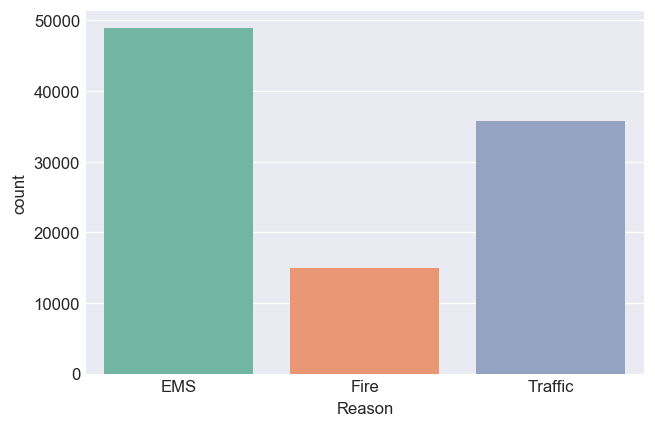

In [481]:
fig = plt.figure(dpi=120)
sns.countplot(df["Reason"], palette="Set2")

In [483]:
type(df["timeStamp"][0])

str

In [484]:
# # Convert the timeStamp Series type to datetime
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [485]:
# Create 3 new columns (Hour, Month and Weekday of the week)

df.insert(loc=df.columns.get_loc("timeStamp")+1, column="Month", \
          value= df["timeStamp"].apply(lambda time: time.month))

# Change the value of day (int) for the name of the day (string)

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df.insert(loc=df.columns.get_loc("timeStamp")+2, column="Day", \
          value=df["timeStamp"].apply(lambda time: dmap[time.weekday()]))

df.insert(loc=df.columns.get_loc("timeStamp")+3, column="Hour", \
          value=df["timeStamp"].apply(lambda time: time.hour))

In [486]:
df.head()

,lat,lng,desc,zip,Reason,title,timeStamp,Month,Day,Hour,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,12,Thu,17,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,12,Thu,17,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,12,Thu,17,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,12,Thu,17,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,12,Thu,17,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


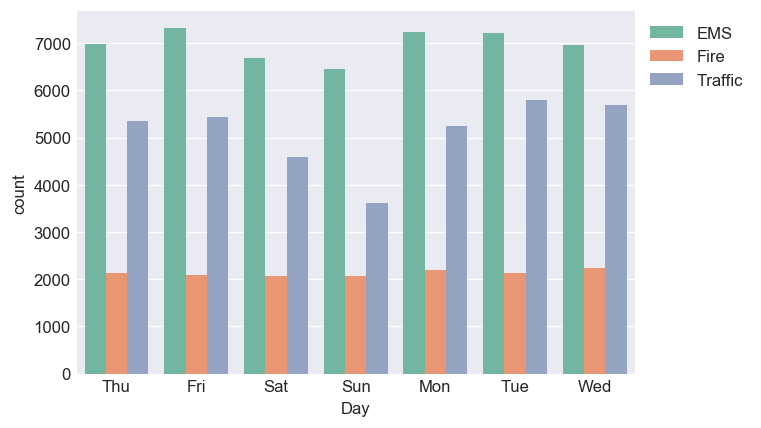

In [511]:
# Check the Reason occurence for each day of the week
fig = plt.figure(dpi=120)
sns.countplot(df["Day"], hue=df["Reason"], palette="Set2")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

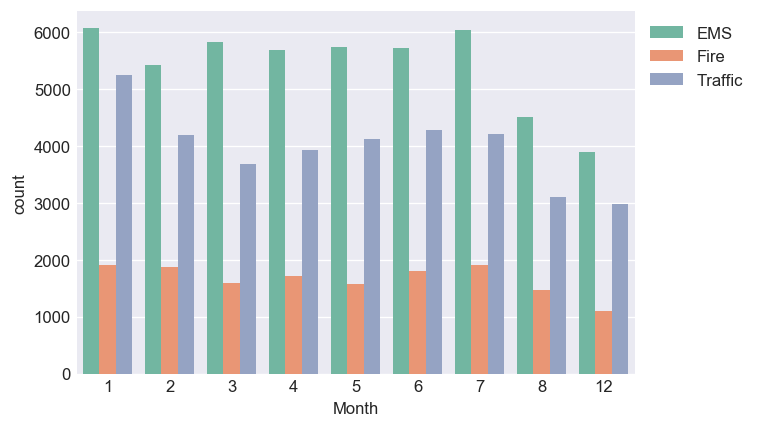

In [513]:
# Check the Reason occurence for each month of the year
fig = plt.figure(dpi=120)
sns.countplot(df["Month"], hue=df["Reason"], palette="Set2")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [603]:
# Group the 911 calls per month to see how many per month on average
byMonth = df.groupby("Month").count()
byMonth

,lat,lng,desc,zip,Reason,title,timeStamp,Day,Hour,twp,addr,e,Date
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13205,13205,13205,13203,13096,13205,13205
2,11467,11467,11467,9930,11467,11467,11467,11467,11467,11465,11396,11467,11467
3,11101,11101,11101,9755,11101,11101,11101,11101,11101,11092,11059,11101,11101
4,11326,11326,11326,9895,11326,11326,11326,11326,11326,11323,11283,11326,11326
5,11423,11423,11423,9946,11423,11423,11423,11423,11423,11420,11378,11423,11423
6,11786,11786,11786,10212,11786,11786,11786,11786,11786,11777,11732,11786,11786
7,12137,12137,12137,10633,12137,12137,12137,12137,12137,12133,12088,12137,12137
8,9078,9078,9078,7832,9078,9078,9078,9078,9078,9073,9025,9078,9078
12,7969,7969,7969,6907,7969,7969,7969,7969,7969,7963,7916,7969,7969


### There is some missing months (9 to 11)

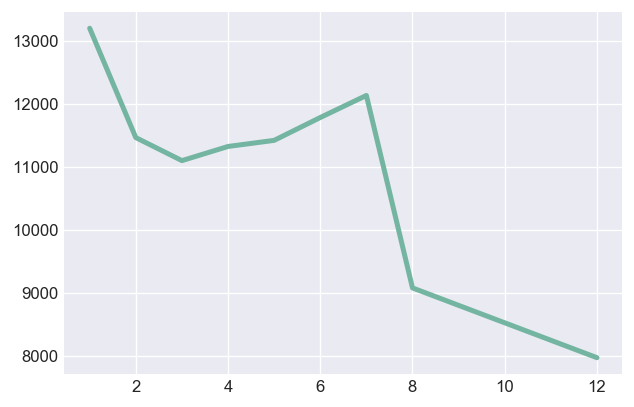

In [528]:
# Plot to see how many call per month there was
fig = plt.figure(dpi=120)
plt.plot(byMonth["timeStamp"], lw=3, color="#74b5a1")
plt.show()

In [606]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,Reason,title,timeStamp,Day,Hour,twp,addr,e,Date
0,1,13205,13205,13205,11527,13205,13205,13205,13205,13205,13203,13096,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11467,11467,11467,11465,11396,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11101,11101,11101,11092,11059,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11326,11326,11326,11323,11283,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11423,11423,11423,11420,11378,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11786,11786,11786,11777,11732,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12137,12137,12137,12133,12088,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9078,9078,9078,9073,9025,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7969,7969,7969,7963,7916,7969,7969


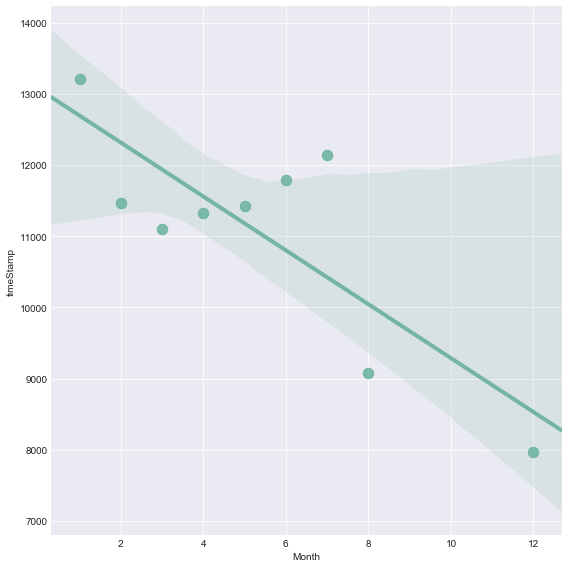

In [607]:
# Plot scatter plot of the number of calls per month with a linear reg plot est.
sns.lmplot(x="Month", y="timeStamp", data=byMonth.reset_index(), palette="Set2", size=8, \
           scatter_kws={'color': '#60af97', "s": 110}, line_kws={'color': '#74b5a1', "lw":4})
plt.show()

In [608]:
# Create a "Date" columnon the main df
df["Date"] = df["timeStamp"].apply(lambda datetime: datetime.date())
df.head()

,lat,lng,desc,zip,Reason,title,timeStamp,Month,Day,Hour,twp,addr,e,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,12,Thu,17,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,12,Thu,17,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,12,Thu,17,NORRISTOWN,HAWS AVE,1,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,12,Thu,17,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS,EMS: DIZZINESS,2015-12-10 17:40:01,12,Thu,17,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015-12-10


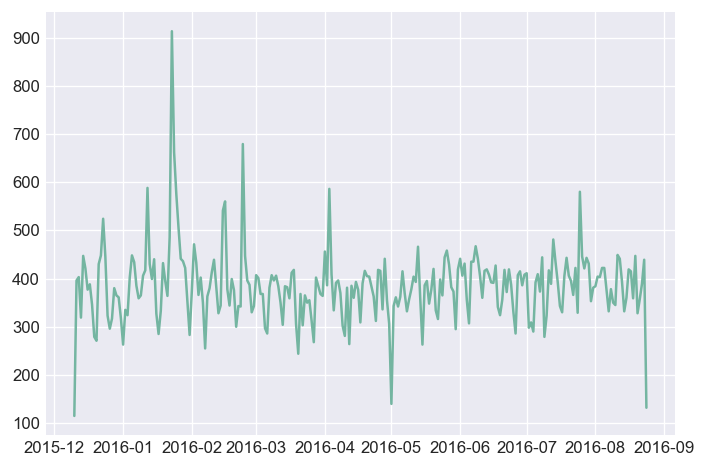

In [609]:
# plot the total number of calls per day
fig = plt.figure(dpi=120)
plt.plot(df.groupby("Date").count()["timeStamp"], color='#74b5a1')
plt.tight_layout()

In [590]:
df.head(3)

,lat,lng,desc,zip,Reason,title,timeStamp,Month,Day,Hour,twp,addr,e,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,12,Thu,17,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,12,Thu,17,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,12,Thu,17,NORRISTOWN,HAWS AVE,1,2015-12-10


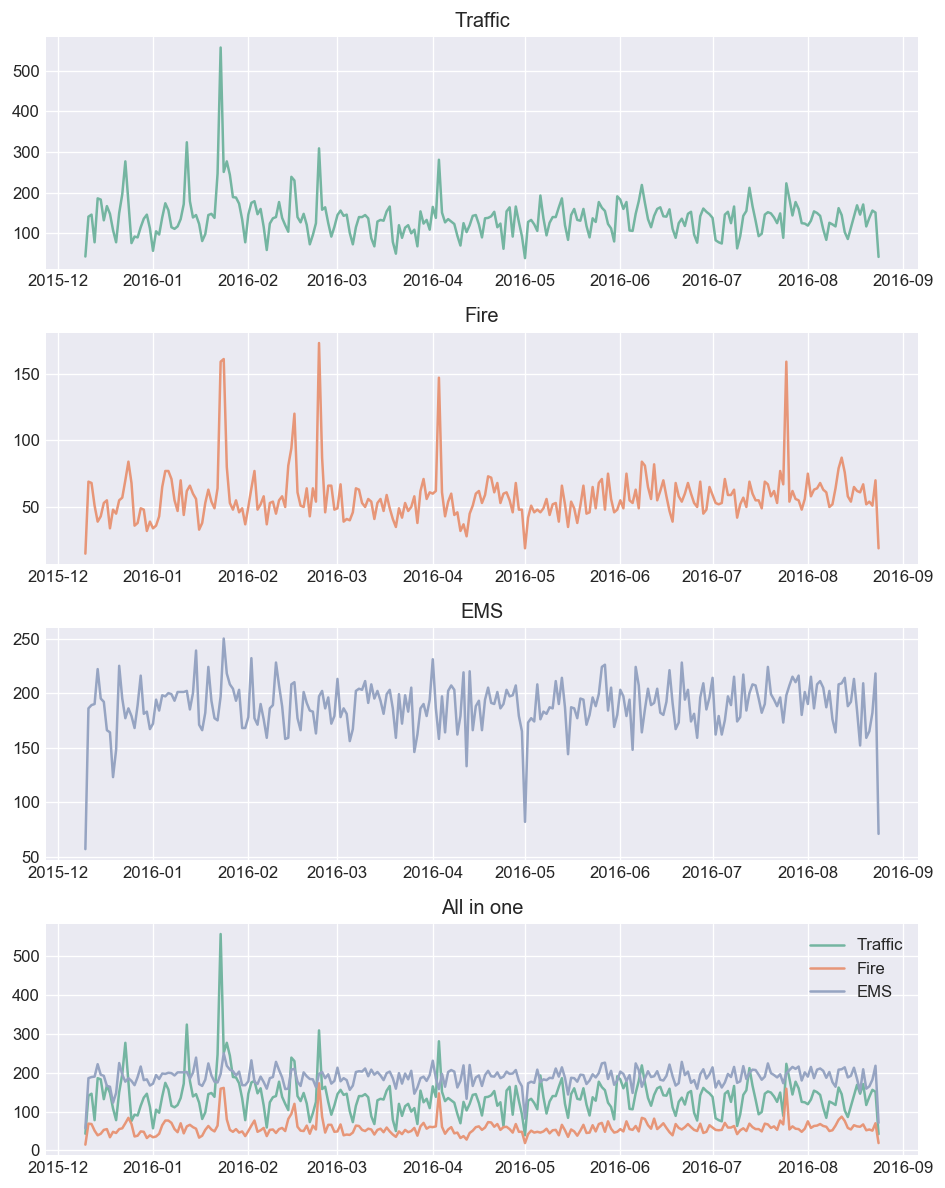

In [617]:
# Separate the plot with the 3 diff Reasons and plot the total number of calls per day

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(8,10), dpi=120)

colors = ["#74b5a1", "#e79678", "#96a4c2"]

# Plot for Traffic
ax1.plot(df[df["Reason"] == "Traffic"].groupby("Date").count()["timeStamp"], color=colors[0])
ax1.set_title("Traffic")

# Plot for Fire
ax2.plot(df[df["Reason"] == "Fire"].groupby("Date").count()["timeStamp"], color=colors[1])
ax2.set_title("Fire")

# Plot for EMS
ax3.plot(df[df["Reason"] == "EMS"].groupby("Date").count()["timeStamp"], color=colors[2])
ax3.set_title("EMS")

# Plot them all in the same figure
ax4.plot(df[df["Reason"] == "Traffic"].groupby("Date").count()["timeStamp"], color=colors[0], label="Traffic")
ax4.plot(df[df["Reason"] == "Fire"].groupby("Date").count()["timeStamp"], color=colors[1], label="Fire")
ax4.plot(df[df["Reason"] == "EMS"].groupby("Date").count()["timeStamp"], color=colors[2], label="EMS")
ax4.set_title("All in one")
ax4.legend()


plt.tight_layout()
plt.show()

In [496]:
df.head(1)

,lat,lng,desc,zip,Reason,title,timeStamp,Month,Day,Hour,twp,addr,e,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,12,Thu,17,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10


In [618]:
# Create a new dataframe for the heatmap
# Create a matrix by grouping the Day and Hour and unstack it aftermath to get it right clean
byDayAndHour = df.groupby(["Day", "Hour"])["timeStamp"].count().unstack()

byDayAndHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Text(0.5,1,'Calls per hours per weekdays')

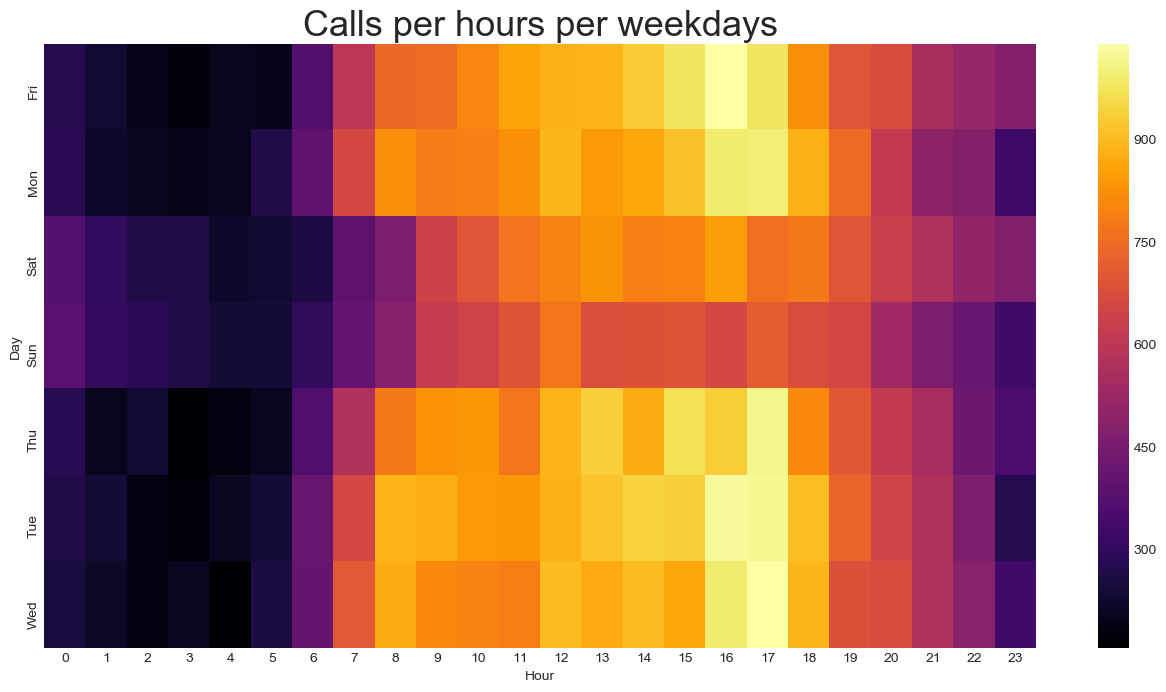

In [619]:
# Create a heatmap of the number of calls per hours per weekdays
fig = plt.figure(figsize=(16,8), dpi=100)
sns.heatmap(byDayAndHour, cmap="inferno")
plt.title("Calls per hours per weekdays", fontsize=26)

** Now create a clustermap using this DataFrame. **

Text(0.5,1,'Calls per hours per weekdays')

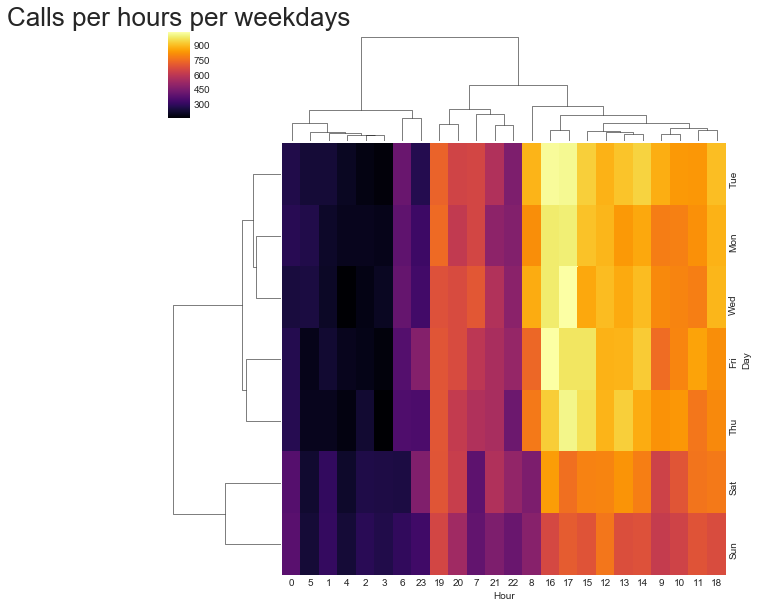

In [620]:
# Create a clustermap of the number of calls per hours per weekdays
fig = plt.figure(figsize=(16,8), dpi=100)
sns.clustermap(byDayAndHour, cmap="inferno")
plt.title("Calls per hours per weekdays", fontsize=26)

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [621]:
# Create a new dataframe for the heatmap
# Create a matrix by grouping the Day and Months and unstack it aftermath to get it right clean
byDayAndMonth = df.groupby(["Day", "Month"])["timeStamp"].count().unstack()

byDayAndMonth

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


Text(0.5,1,'Calls per Months per Weekdays')

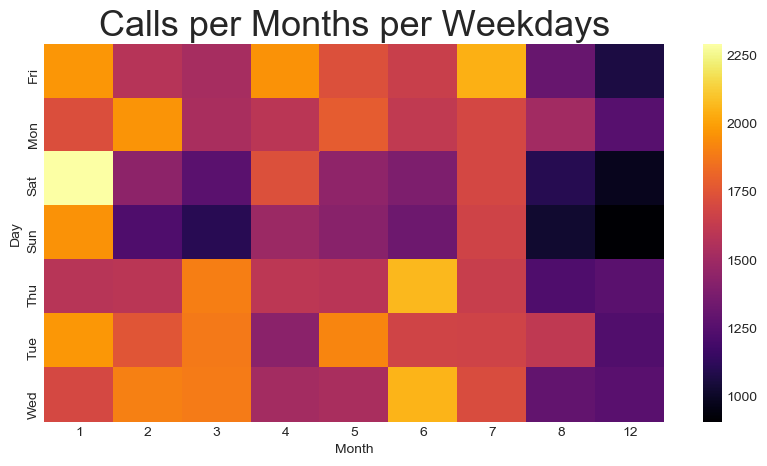

In [622]:
# Create a heatmap of the number of calls per hours per weekdays
fig = plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(byDayAndMonth, cmap="inferno")
plt.title("Calls per Months per Weekdays", fontsize=26)

Text(0.5,1,'Calls per Months per Weekdays')

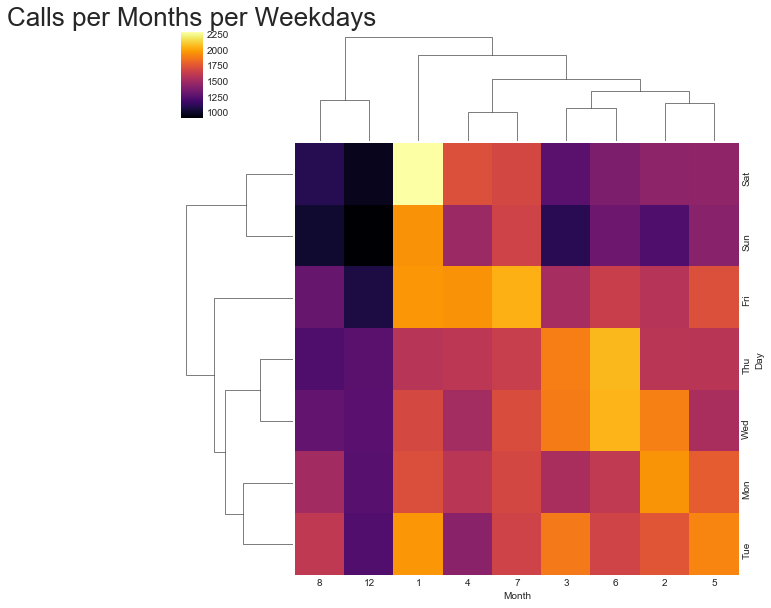

In [623]:
# Create a heatmap of the number of calls per hours per weekdays
fig = plt.figure(figsize=(10,5), dpi=100)
sns.clustermap(byDayAndMonth, cmap="inferno")
plt.title("Calls per Months per Weekdays", fontsize=26)